# HW3 - Random Forest
##### 負責助教：張逸群 toosyou.tw@gmail.com

這次的作業將帶大家建立食譜分類器，用食譜的成分預測此份食譜是屬於哪種類別

## 資料簡介
Picture yourself strolling through your local, open-air market... What do you see? What do you smell? What will you make for dinner tonight?

If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.

Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients. 

## 評分標準
### 原始分數
* 上課繳交：20%
    * 在當天 16:20 前上傳至 new E3 作業，請將以下打包成 .zip 上傳：
        * 程式原始檔 (.ipynb）
        * 程式 .html 檔
    * 並填寫表單上傳程式執行結果
        * 請上傳 .html 檔案至表單
        * __請統一檔名 <學號>-<姓名>.html__
        * [表單連結](https://docs.google.com/forms/d/e/1FAIpQLSdlbNU_u9kb1QpCdXsgX42gx6UcRYCtVnX4E0xVlkjYyEOgug/viewform)
* 程式分數：80%

### 調整分數
* 你的調整分數 = (你的原始分數 - 全部人原始分數平均) x (15. / 全部人原始分數標準差) + 80.


#### 姓名：（點兩下編輯我）
#### 學號：（點兩下編輯我）

## Packages that Might Be Used

In [31]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import difflib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

### 相關連結

* Packages
    * [numpy](http://www.numpy.org/)
    * [pandas](https://pandas.pydata.org/)
    * [re](https://docs.python.org/zh-cn/3/library/re.html)
    * [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
    * [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
    * [difflib](https://docs.python.org/2/library/difflib.html)
    * [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html)
    * [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    * [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
    * [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    * [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
* Markdown
    * jupyter 可以支援 markdown 區塊，方便打上文字說明此份 notebook 在做的事情
    * [wiki](https://zh.wikipedia.org/wiki/Markdown)
    * [教學](https://markdown.tw/)

### Package 解釋 - 10%

請__簡述__以下問題，將 __ans__ 取代為你的答案

1. CountVectorizer 和 LabelEncoder 的用途各自為何？  - 5%
    * A: CountVectorizer 的用途偏向統計; LabelEncoder 的用途偏向歸類
2. 以上兩種有什麼區別？ - 5%
    * A: CountVectorizer 是用來計算字詞出現的頻率; LabelEncoder 是把每個詞做標籤，一樣的字詞會有一樣的標籤

## Load Data - 10%

#### 請使用 pandas 套件，讀取 data.json 檔案成 DataFrame 並取名為 df

In [32]:
df=pd.read_json('./data.json')

#### 請將 df 前五個 __row__ 印出來 - 5%

In [33]:
df.head(5)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


#### 請將 df row 的數量印出來 - 5%

In [34]:
df.count()

cuisine        39774
id             39774
ingredients    39774
dtype: int64

## Statistics - 20%

### Target Value Frequency

#### 請將 df 的 cuisine 的 value frequency 印出 - 5%

In [35]:
print(df['cuisine'].value_counts())

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64


#### 請將 df 的 cuisine 的 value frequency 以圓餅圖（pie chart）方式畫出 - 5%
Hint - Pandas 有內建畫圖功能

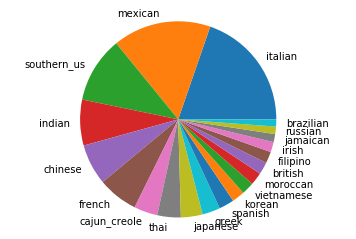

In [36]:
plt.pie(df['cuisine'].value_counts() , labels = df['cuisine'].value_counts().index)
plt.axis('equal')
plt.show()

### Ingredients Length Count

這邊需要注意的是 ```df.ingredients``` 中各個 row 是以 ```list``` 的形式儲存

In [37]:
df.ingredients.head()

0    [romaine lettuce, black olives, grape tomatoes...
1    [plain flour, ground pepper, salt, tomatoes, g...
2    [eggs, pepper, salt, mayonaise, cooking oil, g...
3                  [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pe...
Name: ingredients, dtype: object

#### Hint - 印出每個 instance（row） 中的 ingredient 個數

In [38]:
df.ingredients.str.len().head()

0     9
1    11
2    12
3     4
4    20
Name: ingredients, dtype: int64

#### 請統計 instance（row） 中的 ingredient 個數的 frequency count，後以 ingredient 個數做排序以長條圖（bar chart）畫出 - 10%

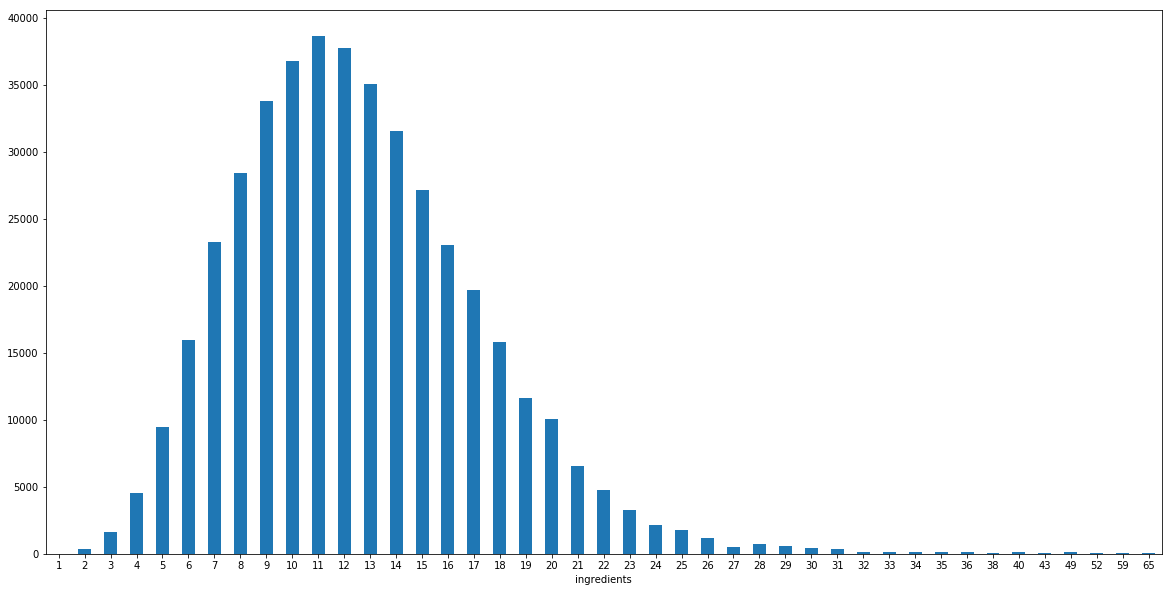

In [39]:
plt.figure(figsize=(20, 10)) # 讓你的圖畫起來可以大大der

df.ingredients.str.len().head(len(df)).groupby(by=df.ingredients.str.len()).sum().plot(kind = 'bar', rot = 0)
plt.show()

## Preprocessing - 15%

#### 為ㄌ體恤各位辛勞，ingredients 前處理的部份小ㄉ幫大家處理完ㄌ
* 4 否覺得ㄗˋ教很 bon [Y/n] - 0%
    * 444444444444444444444

In [40]:
def preprocessing(item):
    newitem = []
    for ingr in item:
        ingr = ingr.lower()
        ingr = re.sub("[^a-zA-Z]"," ",ingr)
        ingr = re.sub((r'\b(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\b'), ' ', ingr)
        newitem.append(ingr)
    return newitem

ingredients_processed = df.ingredients.apply(preprocessing)

#### Q&A - 5%

* 請問上面這個 block 做了什麼事情呢？
    * A: 把 item 裡面不是英文字母的都變成空白，再把符合關鍵字的變成空白，最後加到 newitem 中
* 請問「(1.5 oz.) Tomato Sauce」將變成什麼呢？
    * A: "         ma  sauce"
* [Hint](https://zh.wikipedia.org/wiki/%E6%AD%A3%E5%88%99%E8%A1%A8%E8%BE%BE%E5%BC%8F)

In [41]:
X = [str(i) for i in ingredients_processed]
y = df.cuisine # 此菜屬於哪種種類，此為我們的預測目標

#### 接者請使用 LabelEncoder / CounterVectorizer 將 X 和 Y 進行 encode，並依格式印出第一個 instance 的資訊 - 5%

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_encoder = le.fit(df['cuisine'].drop_duplicates())
vectorizer = CountVectorizer()
X_encoder = vectorizer.fit_transform(X)

In [43]:
print('Original:')
print(df['ingredients'].head(1)[0])

print('Encoded:')
print(X_encoder[0])

print('Inverse Transformed:')
print(vectorizer.inverse_transform(X_encoder[0]))

Original:
[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
Encoded:
  (0, 728)	1
  (0, 512)	1
  (0, 948)	1
  (0, 174)	1
  (0, 1078)	1
  (0, 2389)	1
  (0, 1861)	1
  (0, 2169)	1
  (0, 1985)	1
  (0, 1084)	1
  (0, 2757)	1
  (0, 1159)	1
  (0, 1857)	1
  (0, 237)	1
  (0, 1514)	1
  (0, 2281)	1
Inverse Transformed:
[array([u'crumbles', u'cheese', u'feta', u'beans', u'garbanzo',
       u'seasoning', u'onion', u'purple', u'pepper', u'garlic',
       u'tomatoes', u'grape', u'olives', u'black', u'lettuce', u'romaine'],
      dtype='<U16')]


#### 從 X_encoder 中取得 Unique Ingredents & 從 y_encoder 中取得 Unique Classes - 5%

In [44]:
all_unique_ingredients = vectorizer.get_feature_names()
all_unique_classes = le.classes_

In [45]:
all_unique_ingredients[:10]

[u'abalone',
 u'abbamele',
 u'absinthe',
 u'abura',
 u'acai',
 u'accent',
 u'accompaniment',
 u'achiote',
 u'acid',
 u'acini']

In [46]:
all_unique_classes

array([u'brazilian', u'british', u'cajun_creole', u'chinese', u'filipino',
       u'french', u'greek', u'indian', u'irish', u'italian', u'jamaican',
       u'japanese', u'korean', u'mexican', u'moroccan', u'russian',
       u'southern_us', u'spanish', u'thai', u'vietnamese'], dtype=object)

## Training - 15%

#### 請將資料以 7:3 比例分為 training / testing set，random_state 請給 42 - 0%

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_encoder.toarray(), y_encoder.transform(y), test_size=0.3, random_state=42)

#### 請建 Decision Tree 和 Random Forest 共兩個分類器，分別訓練後將各自 Confusion Matrix 畫出，並將各自 Accuracy, Classification Report 印出 - 10%

Hint - 以下 function 取自[連結](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)，可以將 confusion matrix 畫出

In [48]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

#### Decision Tree

Confusion matrix, without normalization


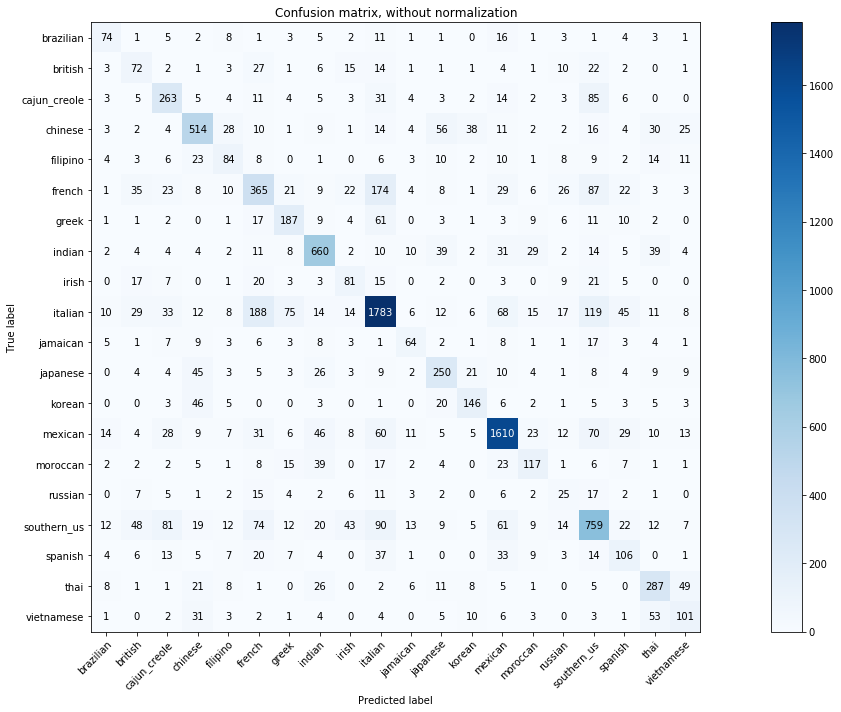

('Accuracy:', 0.6325316349618705)
              precision    recall  f1-score   support

   brazilian       0.52      0.50      0.51       147
     british       0.39      0.30      0.34       242
cajun_creole       0.58      0.53      0.55       495
     chinese       0.66      0.68      0.67       760
    filipino       0.41      0.42      0.41       200
      french       0.43      0.45      0.44       820
       greek       0.57      0.53      0.55       354
      indian       0.75      0.73      0.74       899
       irish       0.43      0.39      0.41       207
     italian       0.72      0.76      0.74      2351
    jamaican       0.43      0.47      0.45       135
    japanese       0.60      0.56      0.58       443
      korean       0.59      0.59      0.59       249
     mexican       0.80      0.82      0.81      1957
    moroccan       0.46      0.49      0.48       237
     russian       0.23      0.17      0.20       144
 southern_us       0.57      0.59      0.58    

In [49]:
dt_clf = DecisionTreeClassifier()
train_dt_clf=dt_clf.fit(X_train, y_train)
test_dt_clf=dt_clf.predict(X_test)

plot_confusion_matrix(confusion_matrix(test_dt_clf, y_test), all_unique_classes)
print('Accuracy:', metrics.accuracy_score(y_test, test_dt_clf))
print(classification_report(y_test, test_dt_clf, [i for i in range(len(all_unique_classes))], all_unique_classes))

#### Random Forest

Confusion matrix, without normalization


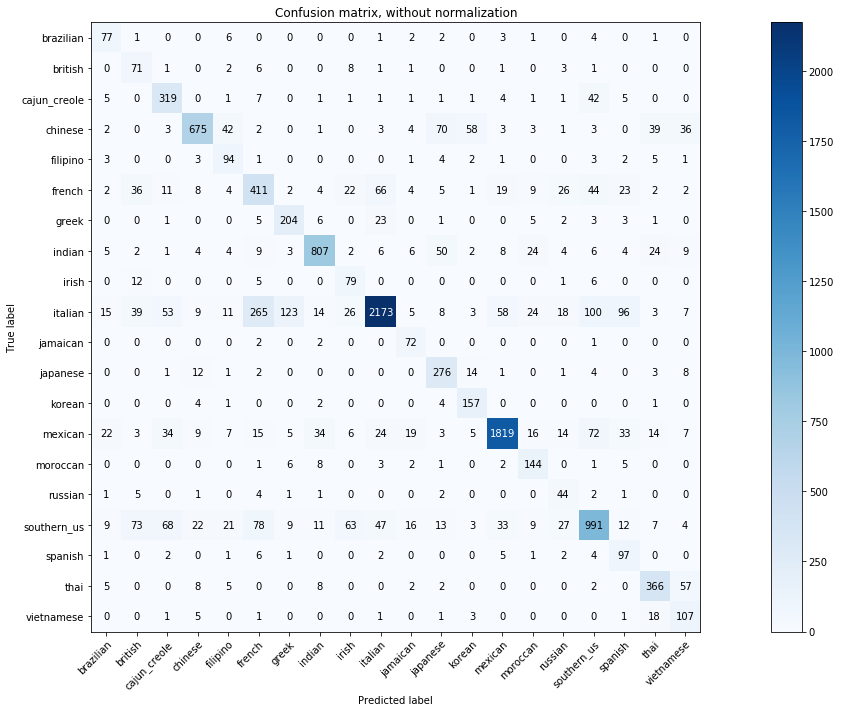

('Accuracy:', 0.7527863906813039)
              precision    recall  f1-score   support

   brazilian       0.79      0.52      0.63       147
     british       0.75      0.29      0.42       242
cajun_creole       0.82      0.64      0.72       495
     chinese       0.71      0.89      0.79       760
    filipino       0.78      0.47      0.59       200
      french       0.59      0.50      0.54       820
       greek       0.80      0.58      0.67       354
      indian       0.82      0.90      0.86       899
       irish       0.77      0.38      0.51       207
     italian       0.71      0.92      0.80      2351
    jamaican       0.94      0.53      0.68       135
    japanese       0.85      0.62      0.72       443
      korean       0.93      0.63      0.75       249
     mexican       0.84      0.93      0.88      1957
    moroccan       0.83      0.61      0.70       237
     russian       0.71      0.31      0.43       144
 southern_us       0.65      0.77      0.71    

In [50]:
rf_clf = RandomForestClassifier(n_estimators = 100)
train_rf_clf=rf_clf.fit(X_train, y_train)
test_rf_clf=train_rf_clf.predict(X_test)

plot_confusion_matrix(confusion_matrix(test_rf_clf, y_test), all_unique_classes)
print('Accuracy:', metrics.accuracy_score(y_test, test_rf_clf))
print(classification_report(y_test, test_rf_clf, [i for i in range(len(all_unique_classes))], all_unique_classes))

#### Q&A - 5%
* 你為什麼選擇這樣的參數？
    * 資料只有三萬多筆，感覺 100 棵樹就差不多了
* 哪種菜的預測效果最好？
    * 兩個平均的話是墨西哥(Mexican)最好; 用 random forest 做是 jamaican; 用 decision tree 是 mexican

## Prediction - 10%

#### 現在你有一個訓練完的 Random Forest Model 了，現在我們希望你對一道菜進行預測：

1. 請到[愛料理](https://icook.tw/?ref=logo)找尋一道你喜歡的菜 __（不可以是「古早味香菇肉燥」）__
2. 將以下內容改成你的那道菜
3. 以 ```rf_clf``` 進行預測
4. 請問預測是否正確？你認為為什麼？
    * 正確。洋蔥、鹽、辣椒、胡椒、蒜 似乎都是墨西哥料理中很常使用的調味料，而且我特地挑預測結果在 decision tree 和 random forest 裡準確率較高的墨西哥料理來測試。

### [墨西哥辣炒飯](https://icook.tw/recipes/24143)
![墨西哥辣炒飯](https://tokyo-kitchen.icook.network/uploads/recipe/cover/24143/large_3501f5746ad118f0.jpg)

#### 食材
* 飯
* 德式香腸
* 洋蔥
* 辣椒
* 絞肉
* 蒜頭
* 墨西哥香草鹽
* 黑胡椒
* 番茄醬

#### 自行翻譯成類似ㄉ英文
* rice
* sausage
* onion
* chili
* ground meat
* garlic
* mexican vanilla salt
* black pepper
* ketchup

In [51]:
to_predict_X = vectorizer.transform(['rice sausage onion chili ground meat garlic mexican vanilla salt black pepper ketchup'])

In [52]:
print(to_predict_X)
print(vectorizer.inverse_transform(to_predict_X))

  (0, 237)	1
  (0, 539)	1
  (0, 1084)	1
  (0, 1194)	1
  (0, 1413)	1
  (0, 1655)	1
  (0, 1682)	1
  (0, 1861)	1
  (0, 1985)	1
  (0, 2247)	1
  (0, 2335)	1
  (0, 2364)	1
  (0, 2855)	1
[array([u'black', u'chili', u'garlic', u'ground', u'ketchup', u'meat',
       u'mexican', u'onion', u'pepper', u'rice', u'salt', u'sausage',
       u'vanilla'], dtype='<U16')]


In [53]:
print(y_encoder.inverse_transform(rf_clf.predict(to_predict_X)))

[u'mexican']


#### Hint - 可以使用以下指令在 all_unique_ingredients 查詢類似的字串

In [54]:
difflib.get_close_matches('bean sauce', all_unique_ingredients)

[u'sauce', u'beans', u'sauces']

## Ｕ迷Ｕ想對ㄗˋ教說ㄉ話 - 0%

這個份量要在3個小時內做完對剛學機器學習的我來說好像有點困難orz